<a href="https://colab.research.google.com/github/undefinedzack/Uniform-Cost-Search-Algorithm-Visualization-with-Python/blob/master/Uniform_Cost_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Created by Adhney
! pip install pydot3 graphviz imageio

In [82]:
import pydot
import os
import math
import time
from IPython.display import Image, display
import imageio

In [83]:
images = []

def uniform_cost_search(graph, dest):
  visited = []
  queue = [graph[0]]
  flag = False
  while queue:
 
    node = queue.pop(0)
    visited.append(node)
    
    node[2].sort(key= lambda x:x[1], reverse=True)
    
    for j in range(len(node[2])):
      if graph[node[2][j][0]][1] == False:
        queue.insert(0, graph[node[2][j][0]])
 
    node[1] = True
    print(visited)
 
    G = pydot.Dot(graph_type='digraph') # initializing the Graph

    for node in graph:
      if node[1] == True and node[0] != dest:
        color = 'red'
      elif node[1] == True and node[0] == dest:
        color = 'green'
        flag = True
      else:
        color = 'yellow'
      
      inode = pydot.Node(node[0], style='filled', fillcolor=color )
      G.add_node(inode)
      for z in range(len(node[2])):
        edge = pydot.Edge(inode, node[2][z][0], label=node[2][z][1])
        G.add_edge(edge)
    
    img = G.create_png()
    im = Image(img)
    images.append(img)
    display(im)
    time.sleep(2)
 
    if flag == True:
      print('FOUND IT!')
      break

[[0, True, [(4, 3), (1, 2)]]]


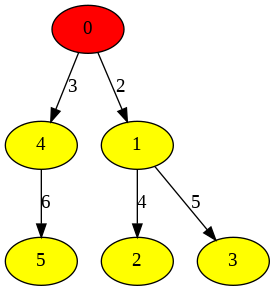

[[0, True, [(4, 3), (1, 2)]], [1, True, [(3, 5), (2, 4)]]]


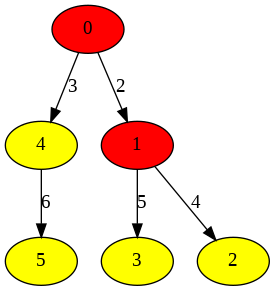

[[0, True, [(4, 3), (1, 2)]], [1, True, [(3, 5), (2, 4)]], [2, True, []]]


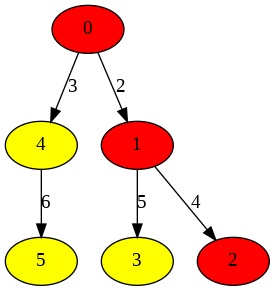

[[0, True, [(4, 3), (1, 2)]], [1, True, [(3, 5), (2, 4)]], [2, True, []], [3, True, []]]


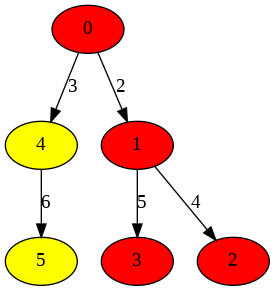

[[0, True, [(4, 3), (1, 2)]], [1, True, [(3, 5), (2, 4)]], [2, True, []], [3, True, []], [4, True, [(5, 6)]]]


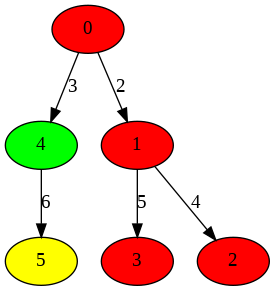

FOUND IT!


In [84]:
#driver code
 
graph = [
         [0, False, [ (1, 2), (4, 3) ] ],
         [1, False, [ (2, 4), (3, 5) ] ],
         [2, False, [] ],
         [3, False, [] ],
         [4, False, [ (5, 6) ] ],
         [5, False, [] ],
]
 
dest = 4
 
uniform_cost_search(graph, dest)

In [85]:
# Converting images format for GIF creation
for i in range(len(images)):
  images[i] = imageio.imread(images[i])

In [86]:
# Creating GIF
imageio.mimsave('GiF.gif', images, format='GIF', duration = 2)

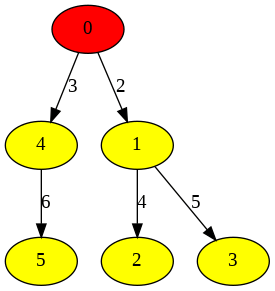

In [87]:
Image(open('GiF.gif', 'rb').read())